# NASA Common Research Model
## Drag Prediction Workshop


### References

http://aaac.larc.nasa.gov/tsab/cfdlarc/aiaa-dpw/

http://aaac.larc.nasa.gov/tsab/cfdlarc/aiaa-dpw/Workshop5/presentations/DPW5_Presentation_Files/14_DPW5%20Summary-Draft_V7.pdf


## Define Data Location
For remote data the interaction will use ssh to securely interact with the data<br/>
This uses the reverse connection capability in paraview so that the paraview server can be submitted to a job scheduler<br/>
Note: The default paraview server connection will use port 11111

In [1]:
remote_data = True
remote_server_auto = True

case_name = 'dpw5_L3'
data_dir='/gpfs/thirdparty/zenotech/home/dstandingford/VALIDATION/NASA_CRM'
data_host='dstandingford@vis03'
paraview_cmd='mpiexec /gpfs/cfms/apps/zCFD/bin/pvserver'

if not remote_server_auto:
    paraview_cmd=None

if not remote_data:
    data_host='localhost'
    paraview_cmd=None

### zCFD Validation and Regression

In [2]:
# Validation criteria setup for CRM lift-matched (C_L = 0.5) L3 mesh drag components 
validate = True
regression = True
if (validate):
    valid = True
    valid_lower_alpha  = 2.20000-0.05000
    valid_upper_alpha  = 2.20000+0.05000
    valid_lower_cl     = 0.50000-0.00500
    valid_upper_cl     = 0.50000+0.00500
    valid_lower_cd     = 0.02502-0.00062
    valid_upper_cd     = 0.02502+0.00062
    valid_lower_cdp    = 0.01400-0.00050
    valid_upper_cdp    = 0.01400+0.00050
    valid_lower_cdf    = 0.01100-0.00075
    valid_upper_cdf    = 0.01100+0.00075
    print 'VALIDATING CRM DPW5 CASE'
    
if (regression):
    print 'REGRESSION CRM DPW5 L3 CASE'


VALIDATING CRM DPW5 CASE
REGRESSION CRM DPW5 L3 CASE


### Initialise Environment

In [3]:
%pylab inline
from paraview.simple import *
paraview.simple._DisableFirstRenderCameraReset()
import pylab as pl
import math

Populating the interactive namespace from numpy and matplotlib
paraview version 4.2.0-77-g31a1d2a


### Data Connection
This starts paraview server on remote host and connects

In [4]:
from zutil.post import pvserver_connect
if remote_data:
    pvserver_connect(data_host=data_host,data_dir=data_dir,paraview_cmd=paraview_cmd)

Testing passwordless ssh access
-> Passed
Attempting to find unused port
[dstandingford@vis03] Executing task 'run_uname'
[dstandingford@vis03] Executing task 'port_test'
Selected Port: 12001
Starting pvserver connect
[dstandingford@vis03] Executing task 'port_test'
Starting pvserver process
[dstandingford@vis03] Executing task 'pvserver'
[dstandingford@vis03] run: /bin/bash -l -c "cd /gpfs/thirdparty/zenotech/home/dstandingford/VALIDATION/NASA_CRM && sleep 2;mpiexec /gpfs/cfms/apps/zCFD/bin/pvserver -rc --client-host=localhost -sp=12001"
[dstandingford@vis03] out: 
[dstandingford@vis03] out: 		   _____ ______ __  __  _____ 
[dstandingford@vis03] out: 		  / ____|  ____|  \/  |/ ____|
[dstandingford@vis03] out: 		 | |    | |__  | \  / | (___  
[dstandingford@vis03] out: 		 | |    |  __| | |\/| |\___ \ 
[dstandingford@vis03] out: 		 | |____| |    | |  | |____) |
[dstandingford@vis03] out: 		  \_____|_|    |_|  |_|_____/ 
[dstandingford@vis03] out: 
[dstandingford@vis03] out: ++++++++++++

### Get control dictionary

In [5]:
from zutil.post import get_case_parameters,print_html_parameters
parameters=get_case_parameters(case_name,data_host=data_host,data_dir=data_dir)

### Get status file

In [6]:
from zutil.post import get_status_dict
status=get_status_dict(case_name,data_host=data_host,data_dir=data_dir)
num_procs = str(status['num processor'])

### Define test conditions

In [7]:
alpha = parameters['IC_1']['alpha'] # degrees
reference_area = 594720.0 # inches^2
reference_length = 275.8 # inches, mean chord. 
reference_span = 1156.75 # inches

from IPython.display import HTML
HTML(print_html_parameters(parameters))

pressure,101325.0
temperature,310.928
Reynolds No,5000000.0
Ref length,275.8
Speed,0.0
Mach No,0.85


In [8]:
from zutil.post import cp_profile_wall_from_file

def plot_cp_profile(ax,file_root,span_loc):
    
    force_data = cp_profile_wall_from_file(file_root,
                              [0.0,1.0,0.0],
                              [0, span_loc*reference_span, 0],
                              func=plot_array,
                              axis=ax,
                              span_loc=span_loc,
                              alpha=alpha)
    
def plot_array(data_array,pts_array,**kwargs):
    ax = kwargs['axis']
    span_loc = kwargs['span_loc']
    cp_array = data_array.GetPointData()['cp']
    chord_array = data_array.GetPointData()['chord']
    ax.plot(chord_array, cp_array , 'b.',color='b',label='zCFD SST')

### Comparison Data

In [9]:
# Reproduce plots from DPW5 presentation, page 45
# Pressure data points (reference semi-span: 1156.75) 
# Station Type          WBL      ETA     Chord
# 1       CFD Cut Only  121.459  0.1050  466.5
# 2       CFD Cut Only  133.026  0.1150  459.6
# 3       CFD Cut Only  144.594  0.1250  452.7
# 4       Pressure Tap  151.074  0.1306  448.8
# 5       Pressure Tap  232.444  0.2009  400.7
# 6       Pressure Tap  327.074  0.2828  345.0
# 7       CFD Cut Only  396.765  0.3430  304.1
# 8       CFD Cut Only  427.998  0.3700  285.8
# 9       Pressure Tap  459.370  0.3971  278.1
# 10      Pressure Tap  581.148  0.5024  248.3
# 11      Pressure Tap  697.333  0.6028  219.9
# 12      Pressure Tap  840.704  0.7268  184.8
# 13      Pressure Tap  978.148  0.8456  151.2
# 14      Pressure Tap  1098.126 0.9500  121.7
# 15      CFD Cut Only  1122.048 0.9700  116.0
# 16      CFD Cut Only  1145.183 0.9900  110.5

#eta_values = [0.1306, 0.2828, 0.3971, 0.5024, 0.7268, 0.9500] # stations 4, 6, 9, 10, 12, 14

from collections import OrderedDict
station_values = OrderedDict([("S04" , 0.1306), ("S06" , 0.2828), ("S09" , 0.3971), 
                              ("S10" , 0.5024), ("S12" , 0.7268), ("S14" , 0.9500)])
sources = [["Edge SST","r"], ["CFD++ SST","g"], ["FUN3D SA", "m"], ["MFlow SA", "y"]] 
dpw5_comparative_data = eval(open('data/DPW5_Comparative_Data.py', 'r').read())


In [10]:
# define function to help with validation check
def validate_data(name, value, valid_lower, valid_upper):
    if ((value < valid_lower) or (value > valid_upper)):
        print 'INVALID: ' + name + ' %.4f '%valid_lower + '%.4f '%value + ' %.4f'%valid_upper
        return False
    else:
        return True    

## Cp Profile

<IPython.core.display.Javascript object>

/Applications/paraview.app/Contents/Python/paraview/vtk/numpy_interface/dataset_adapter.py:126: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if array == None:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

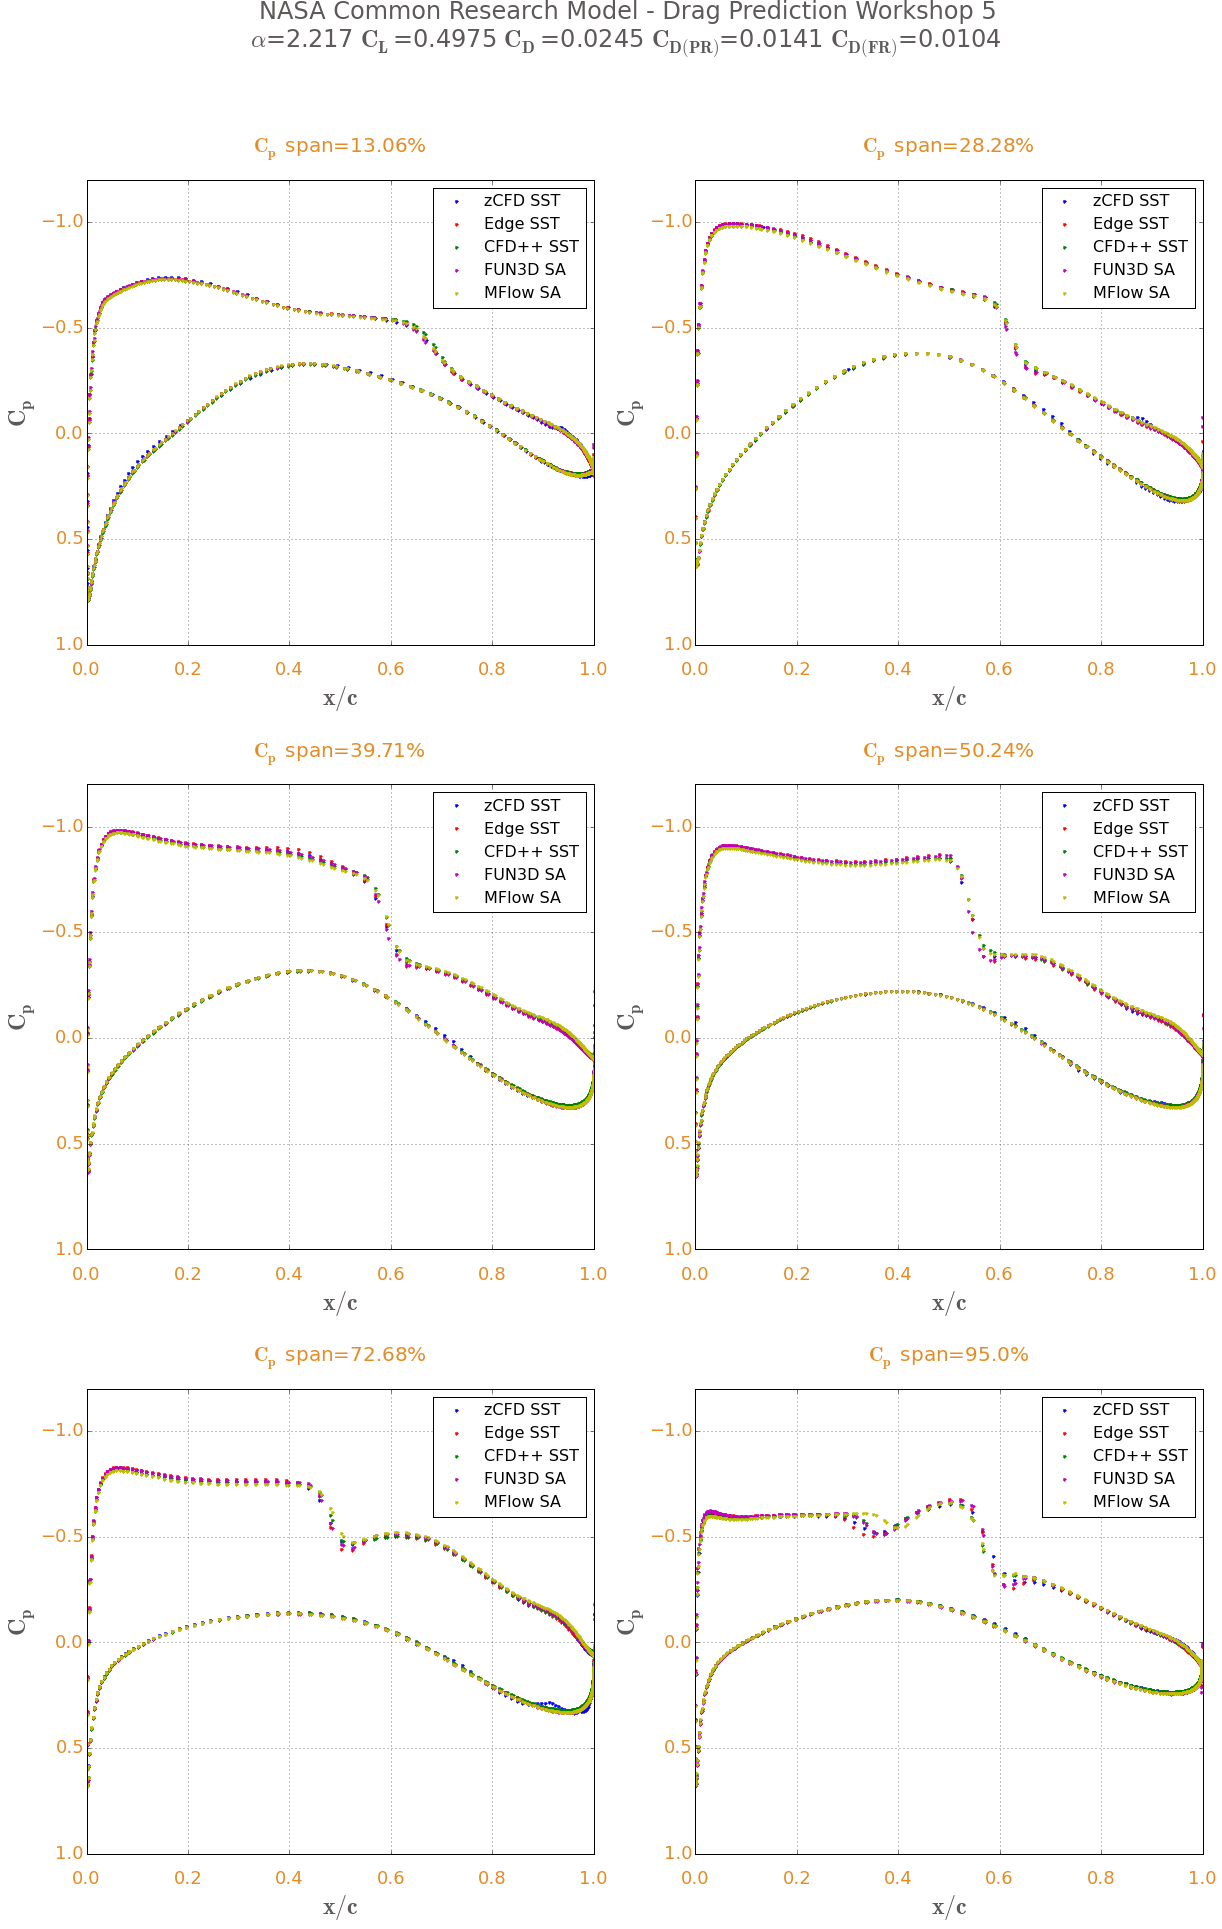

/Users/David/Documents/zPost/ipynb/NASA_CRM/images/DPW5_cp_profile.png

In [11]:
from zutil.post import get_case_root
from zutil.post import calc_force_wall
from zutil.post import ProgressBar
pbar = ProgressBar()

pressure_force, friction_force = calc_force_wall(get_case_root(case_name,num_procs),
                                                 [],half_model=True,
                                                 alpha=alpha)

C_L   = (pressure_force[2] + friction_force[2])/reference_area
C_D_P = pressure_force[0]/reference_area
C_D_F = friction_force[0]/reference_area
C_D   = C_D_P + C_D_F
        
fig = pl.figure(figsize=(20, 30), dpi=150, facecolor='w', edgecolor='#E48B25')

fig.suptitle('NASA Common Research Model - Drag Prediction Workshop 5 \n' 
             + r'$\alpha$=' + ('%.3f ' % alpha) 
             + ('$\mathbf{C_L}$=%.4f ' % C_L) 
             + ('$\mathbf{C_D}$=%.4f ' % C_D) 
             + ('$\mathbf{C_{D(PR)}}$=%.4f ' % C_D_P) 
             + ('$\mathbf{C_{D(FR)}}$=%.4f ' % C_D_F), 
             fontsize=24, fontweight='normal', color = '#5D5858')

plot = 1
pbar+=5

for station in station_values:
    span_loc = station_values[station]
    ax = fig.add_subplot(len(station_values)/2,2,plot)
    ax.set_title('$\mathbf{C_p}$ span='+str(span_loc*100)+'% \n', 
                 fontsize=20, fontweight='normal', color = '#E48B25')
    ax.grid(True)
    ax.set_xlabel('$\mathbf{x/c}$', fontsize=24, fontweight='bold', color = '#5D5858')
    ax.set_ylabel('$\mathbf{C_p}$', fontsize=24, fontweight='bold', color = '#5D5858')
    ax.axis([0.0,1.0,1.0,-1.2])
    plot_cp_profile(ax,get_case_root(case_name,num_procs),span_loc)
    
    for source, colour in sources:
        plotlist_x = []
        plotlist_y = []
        for key, value in dpw5_comparative_data["L3"][source][station]['X/C'].iteritems():
            plotlist_x.append(value)
        for key, value in dpw5_comparative_data["L3"][source][station]['CP'].iteritems():
            plotlist_y.append(value)
        
        ax.plot(plotlist_x, plotlist_y, 'r.', color=colour, label=source)
        
    legend = ax.legend(loc='best', scatterpoints=1, numpoints=1, shadow=False, fontsize=16)
    legend.get_frame().set_facecolor('white')
    ax.tick_params(axis='x', pad=16)
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(18) 
        tick.label.set_fontweight('normal') 
        tick.label.set_color('#E48B25')
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(18)
        tick.label.set_fontweight('normal') 
        tick.label.set_color('#E48B25')    
    
    plot += 1
    pbar+=5

fig.subplots_adjust(hspace=0.3) 
fig.savefig("images/DPW5_cp_profile.png")
pbar.complete()
show()
from IPython.display import FileLink, display 
display(FileLink('images/DPW5_cp_profile.png'))

## Convergence

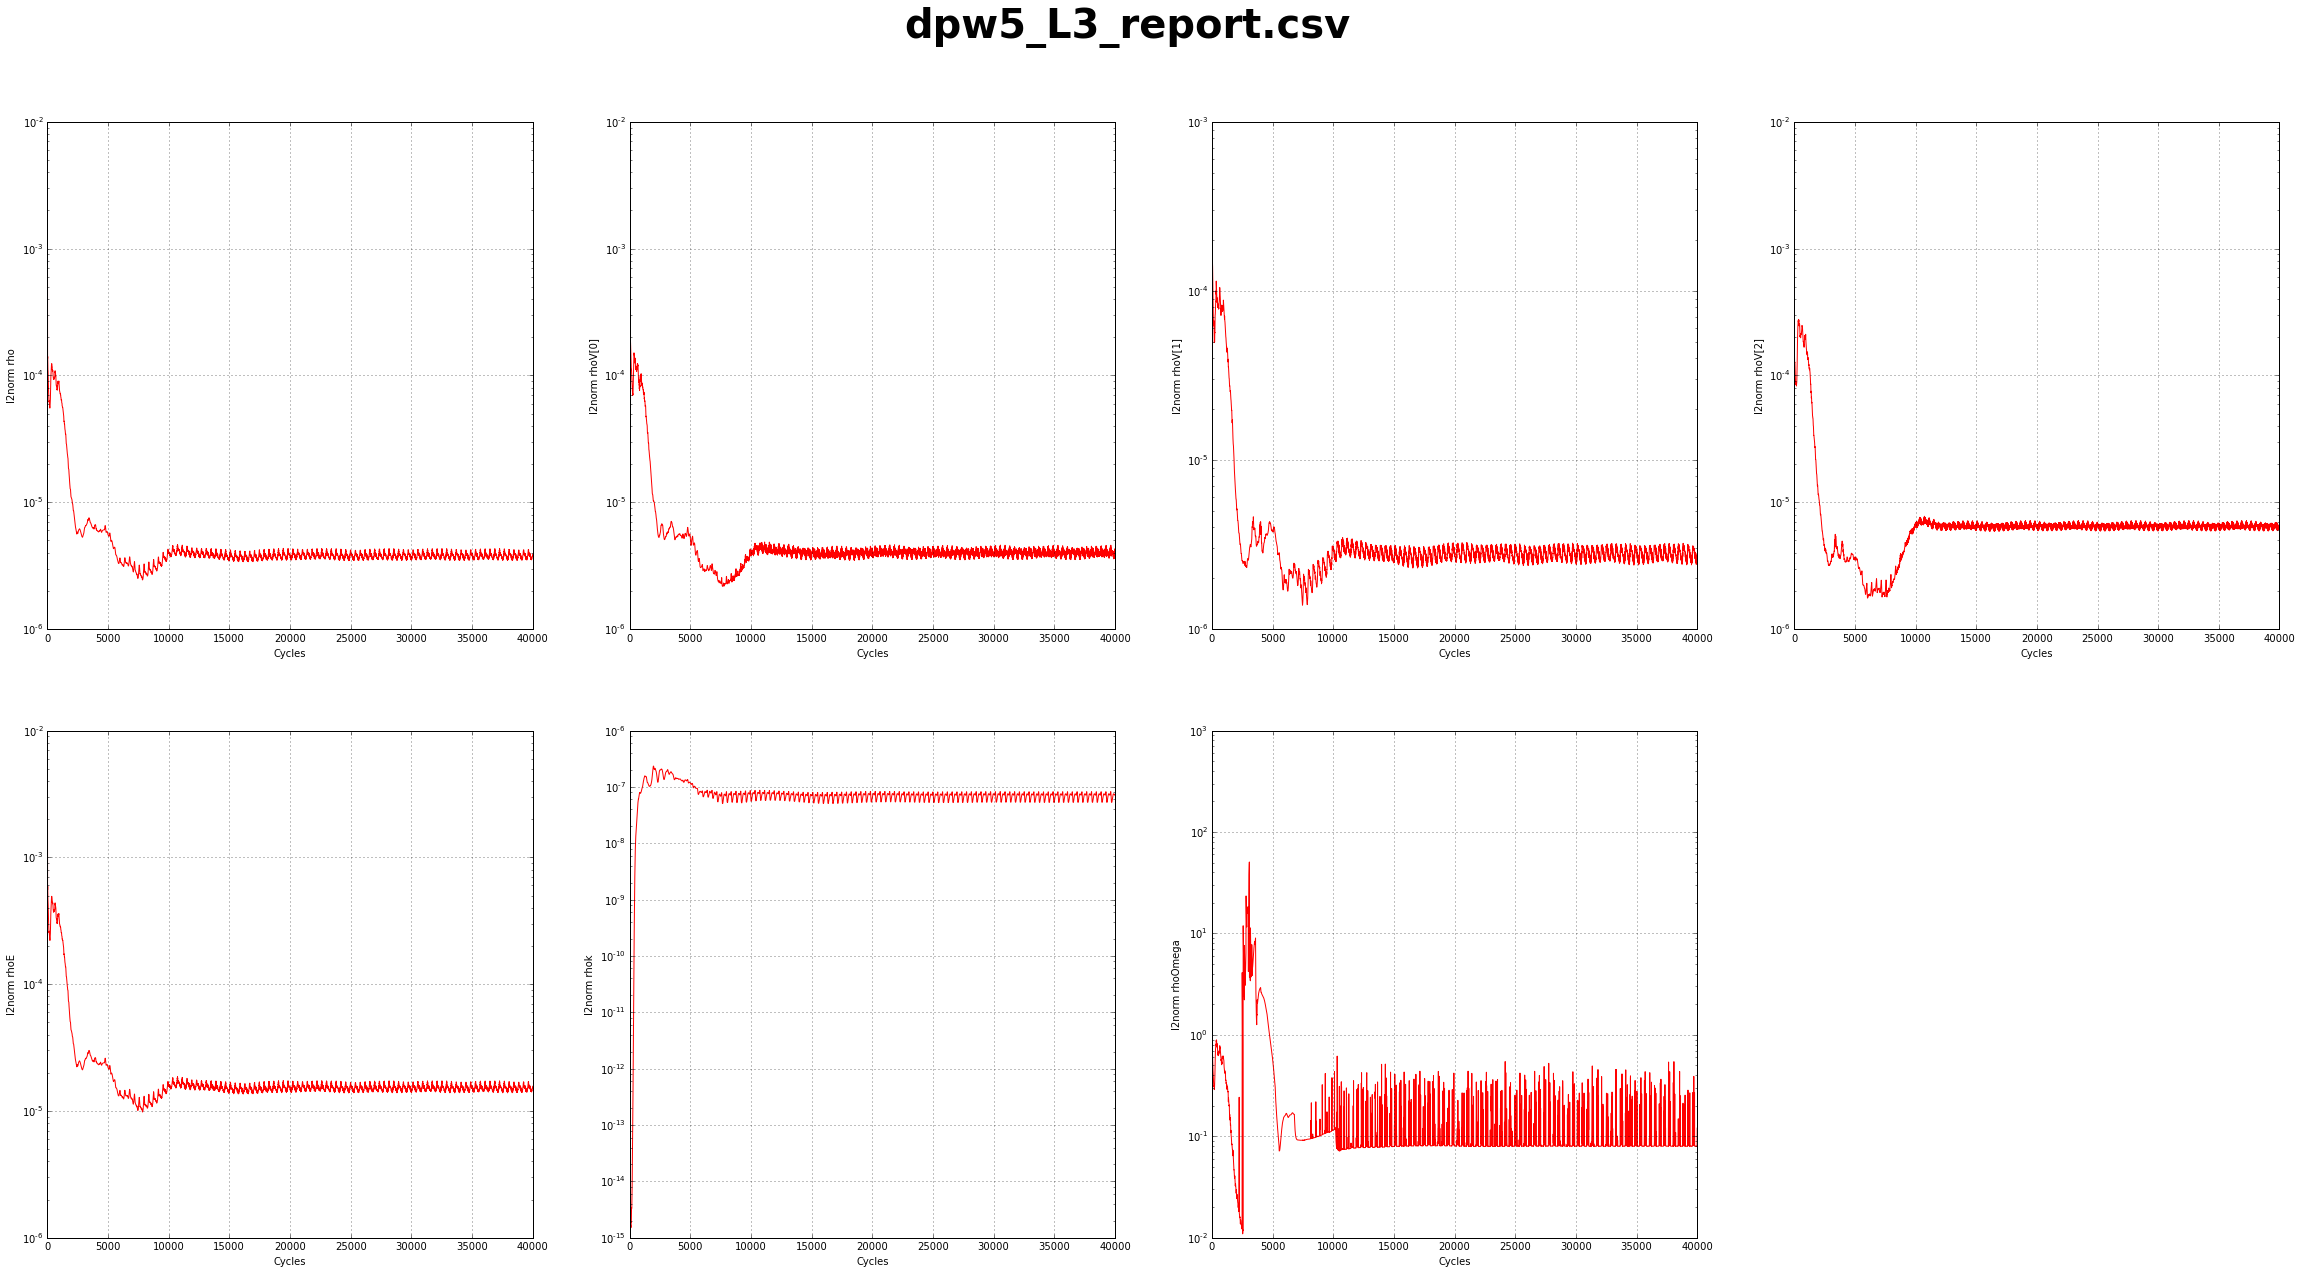

In [12]:
from zutil.post import residual_plot, get_case_report
residual_plot(get_case_report(case_name))
show()

## Check validation and regression

In [13]:
if (validate):
    valid = (validate_data('alpha', alpha, valid_lower_alpha, valid_upper_alpha)
             and validate_data('C_L', C_L, valid_lower_cl, valid_upper_cl)
             and validate_data('C_D', C_D, valid_lower_cd, valid_upper_cd)
             and validate_data('C_D_P', C_D_P, valid_lower_cdp, valid_upper_cdp)
             and validate_data('C_D_F', C_D_F, valid_lower_cdf, valid_upper_cdf))  
    if (valid):
        print 'VALIDATION = PASS :-)'
    else:
        print 'VALIDATION = FAIL :-('   
        


VALIDATION = PASS :-)


In [16]:
if (regression):
    import pandas as pd
    pd.options.display.float_format = '{:,.6f}'.format
    print 'REGRESSION DATA'
    regress = {'version' : ['v0.0'  , 'v0.1'  , 'CURRENT'], 
               'alpha'   : [2.217000, 2.217000, alpha], 
               'C_L'     : [0.497464, 0.497464, C_L],
               'C_D'     : [0.024460, 0.024460, C_D],
               'C_D_P'   : [0.014094, 0.014094, C_D_P],
               'C_D_F'   : [0.010366, 0.010366, C_D_F]}
    regression_table = pd.DataFrame(regress, columns=['version','alpha','C_L','C_D','C_D_P','C_D_F'])
    print regression_table

REGRESSION DATA
   version    alpha      C_L      C_D    C_D_P    C_D_F
0     v0.0 2.217000 0.497464 0.024460 0.014094 0.010366
1     v0.1 2.217000 0.497464 0.024460 0.014094 0.010366
2  CURRENT 2.217000 0.497464 0.024460 0.014094 0.010366
Exiting...
[dstandingford@vis03] out: 



### Cleaning up

In [15]:
if remote_data:
    print 'Disconnecting from remote paraview server connection'
    Disconnect()

Disconnecting from remote paraview server connection
